Diagramatic Representation of the MergeSort 

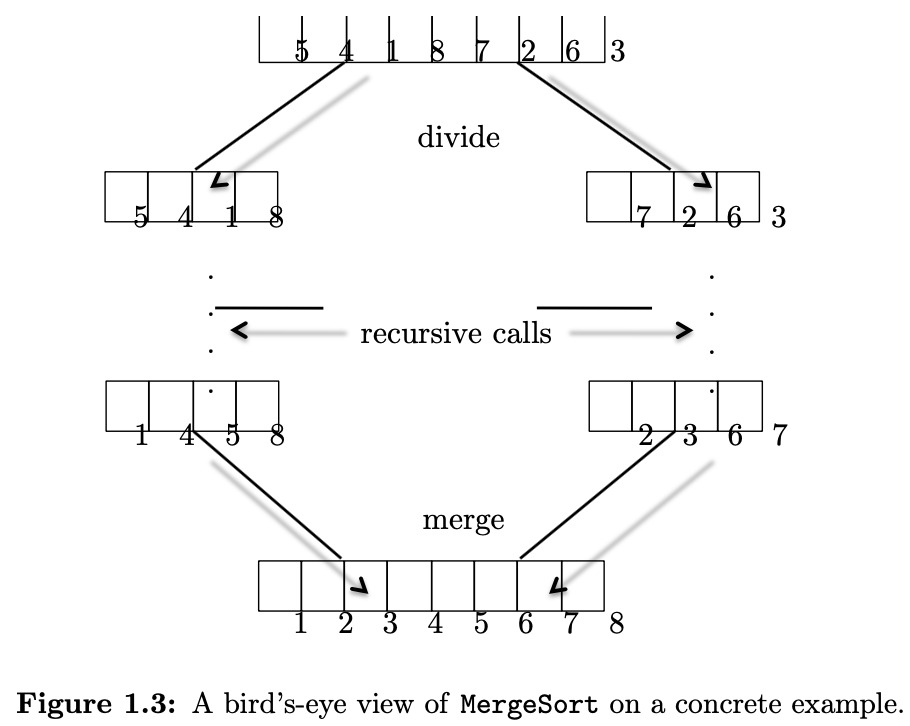

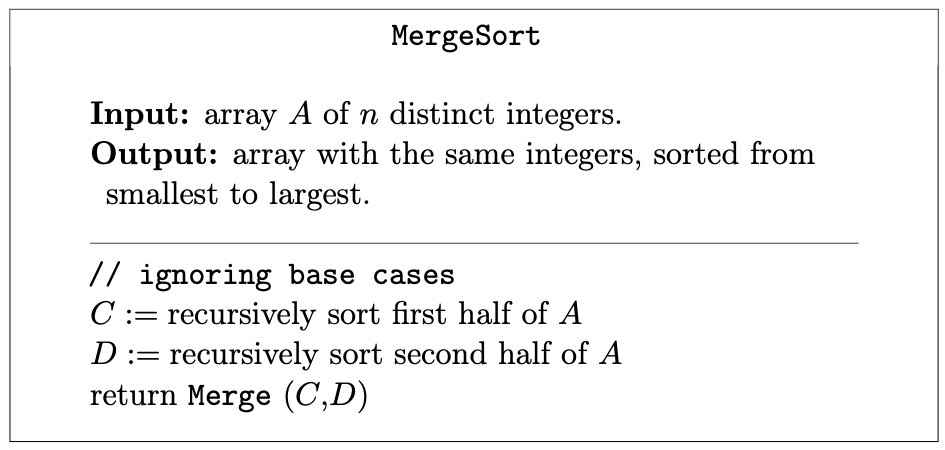

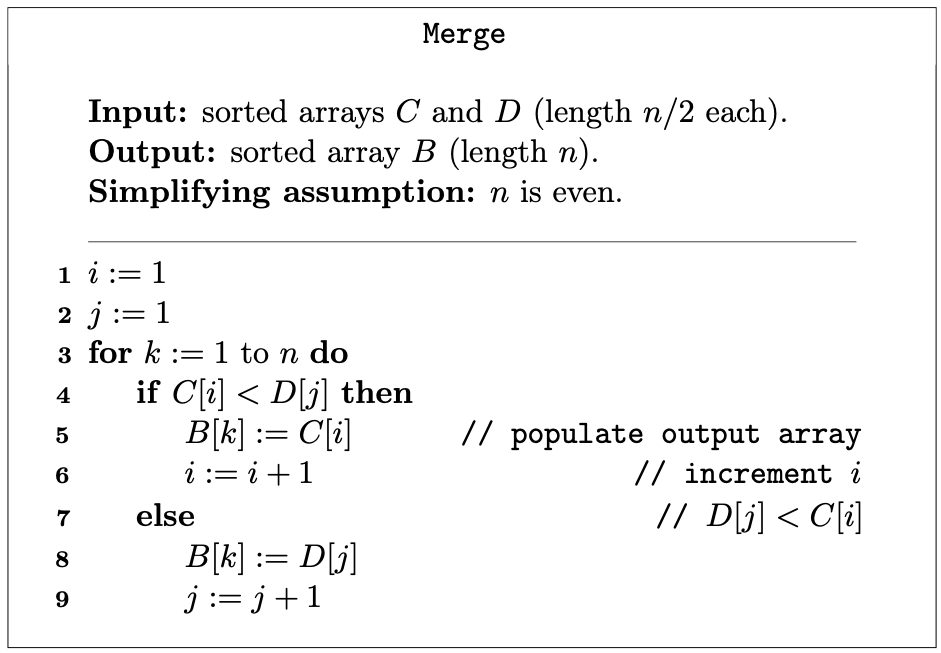

The Merge_Sort Algorithm 
``` 
merge_sort(arr):
  " n = length of the array passed to the merge_sort function"
    if  n == 1: # Our merge_sort base case 
      return arr
    else:
      # If our base case is not true, we recursively divide the array into 
      two equal halfs and call the merge_sort recursively twice in a single 
      function call.
      mid = n // 2 # 
      arr1 = merge_sort(arr[0:mid])
      arr2 = merge_sort(arr[mid:])
    # Once we get back our 2 sorted arrays in arr1 and arr2, we call the merge
      routine, as defined above
      return merge(arr1,arr2)
```


In [ ]:
def merge(arr1,arr2): 
  n = len(arr1)
  m = len(arr2)
  i = 0
  j = 0
  B = []

  while i < n and j < m:
    if arr1[i] <= arr2[j]:
      B.append(arr1[i])
      i+=1
    else:
      B.append(arr2[j])
      j+=1
  
  # In case when n and m are unequal, then the remaining elements of both are list
  # are appended to the sorted list.
  while i < n :
    B.append(arr1[i])
    i+=1

  while j < m :
    B.append(arr2[j])
    j+=1

  print("The sorted Array",B)
  return B


In [ ]:
def merge_sort(arr):
  n = len(arr)
  if  n == 1: # Our merge_sort base case 
    return arr
  else:
    mid = n // 2 # 
    
    arr1 = merge_sort(arr[0:mid])
    arr2 = merge_sort(arr[mid:])
    return merge(arr1,arr2)

In [ ]:
arr = [5,4,1,8,7,2,6,3]
result = merge_sort(arr)
print(result)

The sorted Array [4, 5]
The sorted Array [1, 8]
The sorted Array [1, 4, 5, 8]
The sorted Array [2, 7]
The sorted Array [3, 6]
The sorted Array [2, 3, 6, 7]
The sorted Array [1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]


# <font color='blue'>Merge Sort Analysis</font>

<font color='darkred'>What's the running time of Merge Sort Algorithm, as a function of length $n$ of the input array ? </font>

By "running time", we mean the number of lines of code executed in a concrete implementation of the algorithm We're interested in the number of steps the debugger takes before the program completes.

### <font color='blue'>Running Time of Merge</font>

A single invocation of the Merge subroutine when called on two sorted  arrays of length $l/2$ each 

```
i := 1    -> 1 primitive assignment Operation 
j := 1    -> 1 primitive assignment Operation
for k:= 1 to l Do    -> 1 primitive of incrementing k
  if C[i] < D[j] then  -> 1 comparison <,>,=
    B[k] := C[i]      -> 1 primitive assignment Operation   
    i := i + 1        -> 1 primitive assignment Operation
  else:              else: 
    B[k] := D[j]     
    j := j + 1
```
- $2$ assignment operations 
- with the `if` or `else` get implemented, the number of operations implemented within the forloop for a single pass is $4$.
- Total 6 operations,but the 4 operations within the `for loop` gets executed for every $l$.
- Total operations of Merge Routine : $4l + 2$
- It would be safe to say $4l + 2 \leq 6l $

That is, $6l$ is also a valid upper bound  on the number of operations  performed on the **Merge** subroutine. 

**Lemma (Running Time of Merge)**: 
*For every pair of sorted input arrays $C,D$ of length $l/2$, the Merge subroutine performs at most $6l$ operations.*


### <font color='blue'>Running Time of MergeSort</font>

**Theorem (Running Time of MergeSort)**: *For every input array of length $n \geq 1$, the MergeSort algorithm performs at most*

\begin{align}
6n \text{ }log_2 n + 6n
\end{align}

operations, where $log_2$ denotes the base-2 algorithm

**Proof of Theorem** : To prove the running time bound for MergeSort, the idea is to use the recursion Tree. The idea of the recursion tree method is to write out all the work done by the recursion algorithm in a tree structure, with nodes of the tree corresponding to recursive calls, and the children of a node corresponding  to the recursive calls  made by the node. 

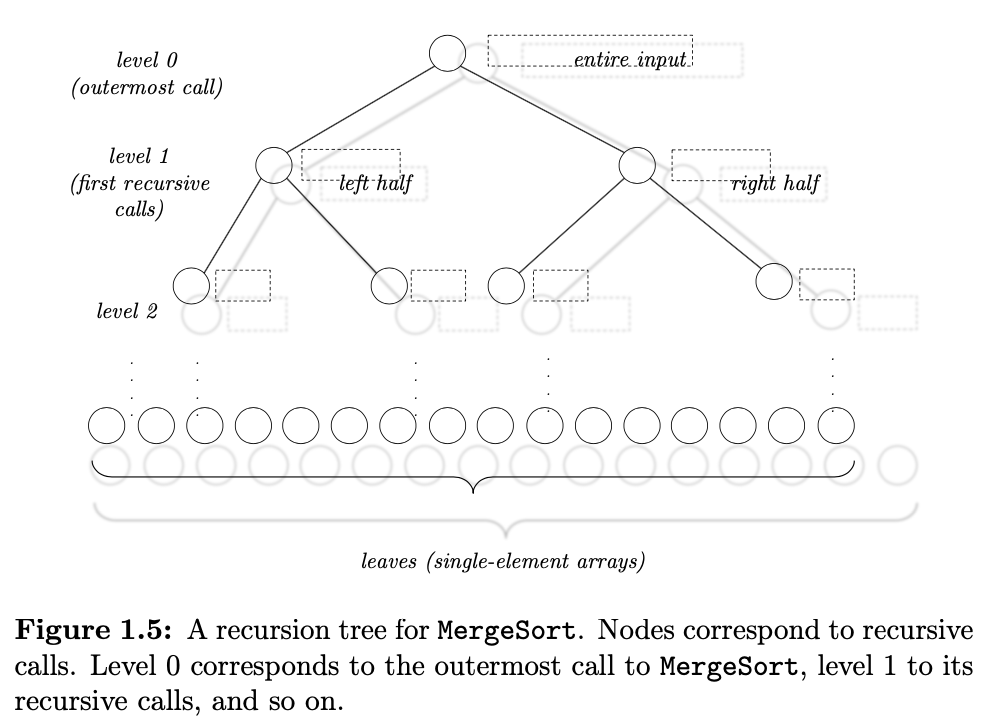

- The root of the recursion tree corresponds to the outermost call to the MergeSort, where the input is the original input array. ( We will call this `Level-0`).
- Each invocation of the MergeSort spwans two recursive calls, the tree will be binary.
- `Level-1` of the tree has two nodes ,corresponding to the two recursive calls  made by the outermost call, one of the left half of the input array, and one for right half.
- Each of the `Level-1` recursive calls  will itself make two recursive calls, each operating on a particular quarter  of the orignial input array.
- This proccess continues  until eventually the recursion bottoms out with arrays of size 0 or 1. ( The very base case of MergeSort recursion)

Q. <font color='darkred'>How many levels does this recursion tree have, as a function of length n of the input array ?</font>
<font color='green'>$log_2 n$</font>

Note : This recursion tree suggests a particular convenient way to account for the work done by the MergeSort, which is level by level. To implement this idea, we need to understand two things: the number of distinct subproblems at a given recursion level $j$, and the length of the input  of each of the subproblems. 

Q.<font color='darkred'>At each level $j = 0,1,2,\ldots,n$ of the recursion tree, there are </font> <font color='green'>$2^j$</font> <font color='darkred'>subproblems, each operating on a subarray of length : </font><font color='green'>$\frac{n}{2^j}$</font> 

## Calculation of the step count : 

Going forth we will work out the numericals by taking a specific stage: 

- We proceed level by level, so fix a level  $j$ of the recursion tree.

- How much work is done by the `level-j` recursive calls, not counting the work done by their recursive calls at later levels?

- Inspecting the MergeSort code, we see that it does only three things:
  -  make two recursive calls 
  -  Invoke the Merge subroutine on the results. 

- Thus ignoring the work done by later recursive calls, the work done by a `level-j` subproblem is just the work done by Merge.

- This we already understand from Lemma: at most $6l$ operations ,where $l$ is the length of the input array to this subproblem.

- To put everything together, we can express the **total work done by level-j recursive calls (not counting later recursive calls) as**

\begin{align}
& \text{ # of level-j subproblems } * \text{ work per level-j subproblem}\\ 
&= 2^j * 6 *\frac{n}{2^j}\\
&= 6n
\end{align}
**operations are performed across all the recursive calls at the jth recursion level.**

Note :\
    - Input length to each such subproblem is $n/2^j$. Taking $l= n/2^j$, Lemma implies that each `level-j` subproblem performs at most $6n/2^j$ operations.\
    - Each level of the recursion tree contributes the same number of operations to the analysis. The reason for this is a perfect equilibrium between two competing forces—the number of subproblems doubles every level, while the amount of work performed per subproblem halves every level.

**We’re interested in the number of operations performed across all levels of the recursion tree.**


\begin{align}
& \text{ number of levels } * \text{ work per level}\\ 
&= (log_2 n + 1) * 6n\\
&= 6n \text{ }log_2 n + 6n
\end{align}



## Unsolved Problems from the Text 

Q.Problem 1.2 *Consider the following modification to the MergeSort algorithm: divide the input array into thirds (rather than halves), recursively sort each third, and finally combine the results using a three-way Merge subroutine. What is the running time of this algorithm as a function of the length n of the input array, ignoring constant factors and lower-order terms?*\
[Hint: Note that the Merge subroutine can still be implemented so that the number of operations is only linear in the sum of the input array lengths.]

Ans: My approach :    

1. Since the array is divided into thirds, our MergeSort Algorithm will slightly vary as :     

``` 
merge_sort(arr):
  " n = length of the array passed to the merge_sort function"
    if  n == 1: # Our merge_sort base case 
      return arr
    else:
      # If our base case is not true, we recursively divide the array into 
      two equal halfs and call the merge_sort recursively twice in a single 
      function call.
      third = n // 3 # 
      arr1 = merge_sort(arr[0:third])
      arr2 = merge_sort(arr[third:2*third])
      arr3 = merge_sort(arr[2*third:])
    # Once we get back our 2 sorted arrays in arr1 and arr2, we call the merge
      routine, as defined above
      return merge(arr1,arr2,arr3)
```
```
Merge SubRoutine

# merging 2 arrays and then the third array.
i := 1    -> 1 primitive assignment Operation 
j := 1    -> 1 primitive assignment Operation
h := 1    ->1 primitive assignment Operation
for k:= 1 to 2l/3 Do    -> 1 primitive of incrementing k
  if C[i] < D[j] then  -> 1 comparison <,>,=
    B[k] := C[i]      -> 1 primitive assignment Operation   
    i := i + 1        -> 1 primitive assignment Operation
  else:              else: 
    B[k] := D[j]     
    j := j + 1

 => 4 * (2*l/3) + 3 Operations   

# merging the 2 merged array with the third.
for k:= 1 to l Do    -> 1 primitive of incrementing k
  if C[i] < D[j] then  -> 1 comparison <,>,=
    B[k] := C[i]      -> 1 primitive assignment Operation   
    i := i + 1        -> 1 primitive assignment Operation
  else:              else: 
    B[k] := D[j]     
    j := j + 1

=> 4 * (l) 

=> 4 * l + 4 *( 2* l/3) + 3 = 20l/3 + 3 < 7l + 3
```



<font color='Green'>Total Number of Levels : $log_3 n + 1$
So, Total running time : $(log_3 n + 1) * (7n) = 7 n log_3 n + 7n = n log n$</font>





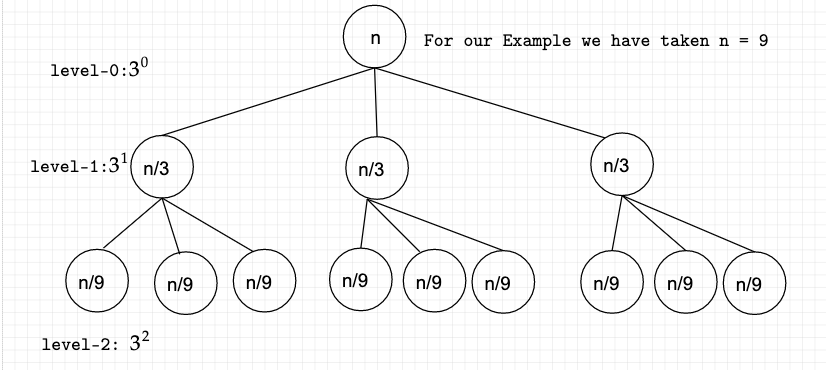

Q. Problem 1.3 Suppose you are given k sorted arrays, each with n elements, and you want to combine them into a single array of kn
34 Introduction
 elements. One approach is to use the Merge subroutine from Sec- tion 1.4.5 repeatedly, first merging the first two arrays, then merging the result with the third array, then with the fourth array, and so on until you merge in the kth and final input array. What is the running time taken by this successive merging algorithm, as a function of k and n, ignoring constant factors and lower-order terms?\
<font color='green'>
Ans :   Using the same logic of merging two lists, then merging the next and then next we get 

`Step:1` : Run time for Merging $2$ lists of size $n$ each : $6*(2n)$\
`Step:2` : Run time for Merging $2$ lists of size $2n$ and $n$ each : $6*(3n)$\
`Step:3` : Run time for Merging $2$ lists of size $2n$ & $2n$ each : $6*(4n)$\
`Step:4` : Run time for Merging $2$ lists of size $4n$ & $n$ each : $6*(5n)$

-  Adding all the Run time : $6*(2n) +6*(3n)+6*(4n)+6(5n) = 6*(14n)$
- $\frac{k(k+1)}{2} - 1$\
- In our case if $k=5, \text{ we get } \frac{5*6}{2} - 1 = 14 = 6*n*k^2$ 

Rounding off by ignoring cosntants : **$nk^2$**.
</font>


Problem 1.4 Consider again the problem of merging k sorted length- n arrays into a single sorted length-kn array. Consider the algorithm that first divides the k arrays into k/2 pairs of arrays, and uses the Merge subroutine to combine each pair, resulting in k/2 sorted length- 2n arrays. The algorithm repeats this step until there is only one length-kn sorted array. What is the running time of this procedure, as a function of k and n, ignoring constant factors and lower-order terms?

<font color='green'>
Ans : In the Merge sort algorithm, we focused on the top-down approach of breaking the array into close structure of the binary tree, by following recursion. 

But, in this questions, we are already given k sorted arrays, and our task is to merge them in a faster possible way than the running time $nk^2$. </font>

We can visualise our solution as : 


